# importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

In [2]:
df= pd.read_csv('/kaggle/input/fashion-products/fashion_products.csv')

# EDA

In [3]:
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [4]:
df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [6]:
df.shape

(1000, 9)

# Distribution of Categorical Variables

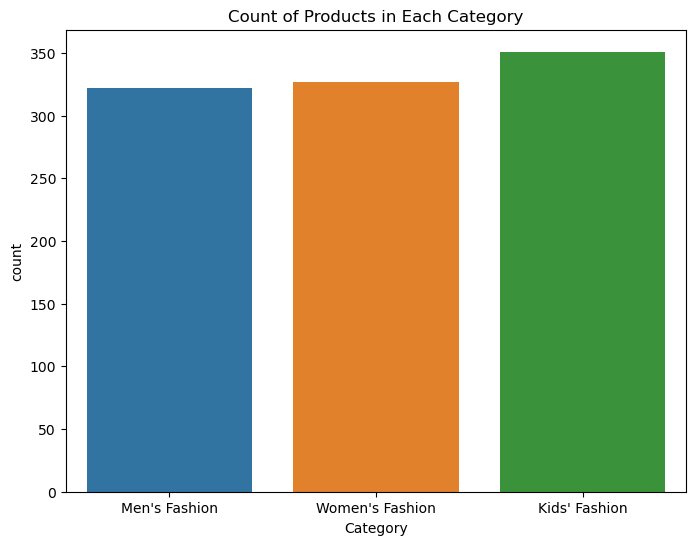

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Category')
plt.title('Count of Products in Each Category')
plt.show()

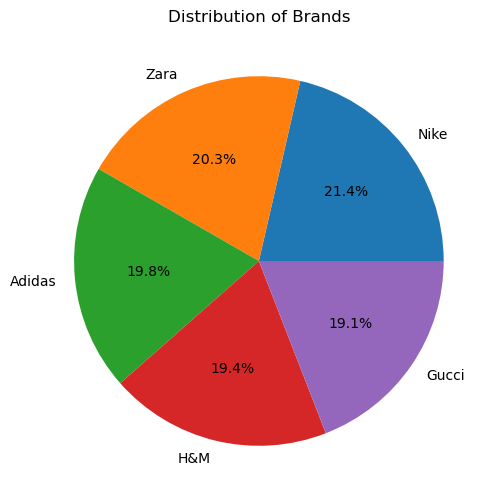

In [8]:
plt.figure(figsize=(8, 6))
df['Brand'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Brands')
plt.ylabel('')
plt.show()

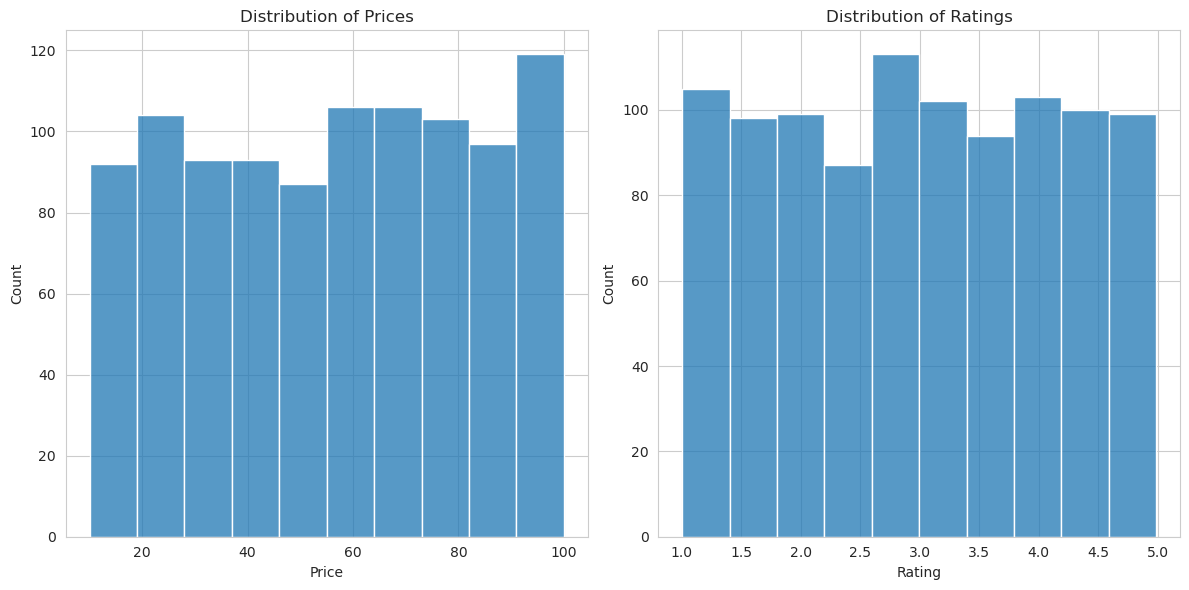

In [9]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot distribution of prices
sns.histplot(data=df, x='Price', bins=10, ax=axes[0])
axes[0].set_title('Distribution of Prices')

# Plot distribution of ratings
sns.histplot(data=df, x='Rating', bins=10, ax=axes[1])
axes[1].set_title('Distribution of Ratings')
plt.tight_layout()
plt.show()

# Multivariate Analysis


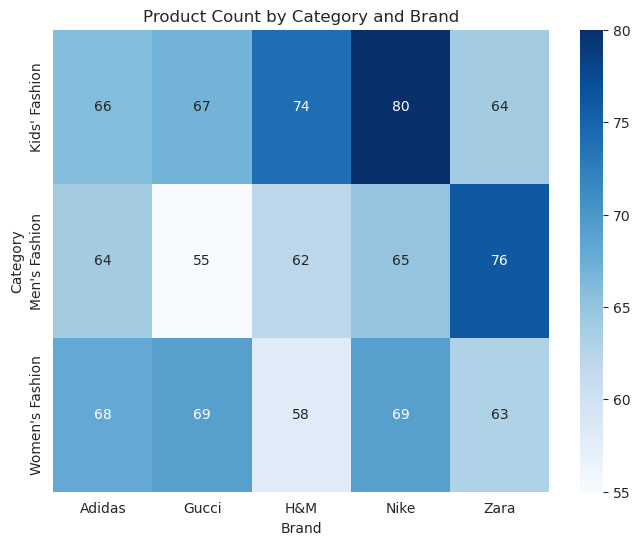

<Figure size 800x600 with 0 Axes>

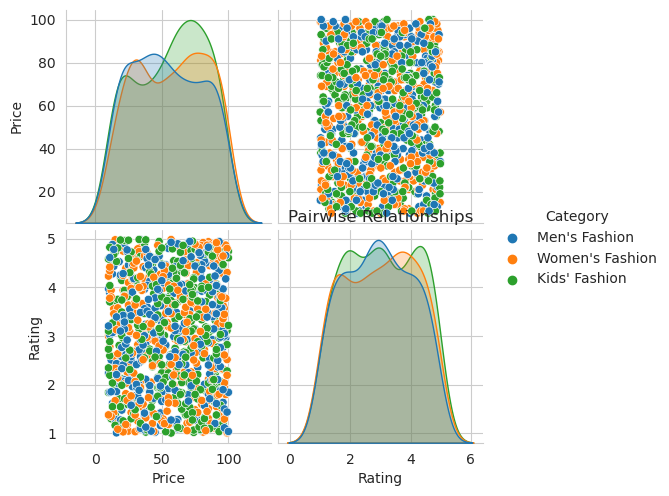

In [10]:
plt.figure(figsize=(8, 6))
category_brand_counts = df.groupby(['Category', 'Brand']).size().unstack()
sns.heatmap(data=category_brand_counts, cmap='Blues', annot=True, fmt='g')
plt.title('Product Count by Category and Brand')
plt.show()

plt.figure(figsize=(8, 6))
sns.pairplot(df[['Price', 'Rating', 'Category']], hue='Category')
plt.title('Pairwise Relationships')
plt.show()


# Hybrid Recommendation System

In [11]:
# Create the Surprise dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['User ID', 'Brand', 'Rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Collaborative Filtering using SVD
algo_cf = SVD()
algo_cf.fit(trainset)

# Brand-Based Recommendation System
def brand_recommendation(user_id, num_recommendations):
    # Collaborative Filtering predictions
    cf_predictions = algo_cf.test(testset)

    # Filter predictions based on user ID and brand
    user_brand_predictions = [pred for pred in cf_predictions if pred.uid == user_id and pred.iid in df[df['User ID'] == user_id]['Brand'].unique()]

    # Sort the predictions by rating in descending order
    user_brand_predictions.sort(key=lambda x: x.est, reverse=True)

    # Get the top N recommendations
    top_recommendations = user_brand_predictions[:num_recommendations]

    return top_recommendations

# Example usage: Get brand recommendations for User ID 97, top 3 recommendations
user_id = 6
num_recommendations = 3
recommendations = brand_recommendation(user_id, num_recommendations)

# Print the recommendations
print(f"Brand Recommendations for User ID {user_id}:")
for recommendation in recommendations:
    brand = recommendation.iid
    rating = recommendation.est
    print(f"Brand: {brand}, Rating: {rating}")

Brand Recommendations for User ID 6:
Brand: Adidas, Rating: 2.9198140942382285
Brand: Adidas, Rating: 2.9198140942382285
Brand: Zara, Rating: 2.8685374195355338
